In [25]:
# ============================================
# CELL 1: Setup and Initial Data Loading
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting parameters
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("🎯 CUSTOMER CHURN PREDICTION PROJECT")
print("=" * 60)

# Load dataset
df = pd.read_csv('../data/raw/telco_customer_churn.csv')

print(f"📊 Dataset Shape: {df.shape}")
print(f"👥 Total Customers: {df.shape[0]:,}")
print(f"📋 Total Features: {df.shape[1]}")

# Basic churn analysis
churn_rate = (df['Churn'] == 'Yes').mean()
churned_count = (df['Churn'] == 'Yes').sum()
retained_count = (df['Churn'] == 'No').sum()

print(f"\n🎯 CHURN OVERVIEW:")
print(f"   📈 Churn Rate: {churn_rate:.2%}")
print(f"   🔴 Churned: {churned_count:,} customers")
print(f"   🟢 Retained: {retained_count:,} customers")

# Quick financial impact
if 'MonthlyCharges' in df.columns:
    avg_monthly_churned = df[df['Churn'] == 'Yes']['MonthlyCharges'].mean()
    total_lost_revenue = df[df['Churn'] == 'Yes']['MonthlyCharges'].sum()
    print(f"\n💰 FINANCIAL IMPACT:")
    print(f"   💸 Monthly Revenue Lost: ${total_lost_revenue:,.2f}")
    print(f"   📊 Avg Monthly Charge (Churned): ${avg_monthly_churned:.2f}")

print(f"\n✅ Data loaded successfully! Let's dive deeper... 🚀")


🎯 CUSTOMER CHURN PREDICTION PROJECT
📊 Dataset Shape: (7043, 21)
👥 Total Customers: 7,043
📋 Total Features: 21

🎯 CHURN OVERVIEW:
   📈 Churn Rate: 26.54%
   🔴 Churned: 1,869 customers
   🟢 Retained: 5,174 customers

💰 FINANCIAL IMPACT:
   💸 Monthly Revenue Lost: $139,130.85
   📊 Avg Monthly Charge (Churned): $74.44

✅ Data loaded successfully! Let's dive deeper... 🚀


In [26]:
# ============================================
# CELL 2: Dataset Overview and Structure
# ============================================

print("🔍 DETAILED DATASET ANALYSIS")
print("=" * 50)

# Display basic info
print("📋 Dataset Info:")
print(df.info())

print(f"\n📊 Column Names ({len(df.columns)} total):")
for i, col in enumerate(df.columns, 1):
    dtype = str(df[col].dtype)
    unique_vals = df[col].nunique()
    print(f"   {i:2d}. {col:<20} | {dtype:<10} | {unique_vals:3d} unique values")

# Check for missing values
print(f"\n🔍 Missing Values Analysis:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print("⚠️ Missing values detected:")
    for col in missing_values[missing_values > 0].index:
        count = missing_values[col]
        percentage = (count / len(df)) * 100
        print(f"   {col}: {count} ({percentage:.1f}%)")

# Display first and last few rows
print(f"\n📋 First 5 rows:")
display(df.head())

print(f"\n📋 Last 5 rows:")
display(df.tail())

🔍 DETAILED DATASET ANALYSIS
📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



📋 Last 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


🎯 CHURN TARGET VARIABLE ANALYSIS
📊 Churn Distribution:
   No: 5,174 customers (73.5%)
   Yes: 1,869 customers (26.5%)


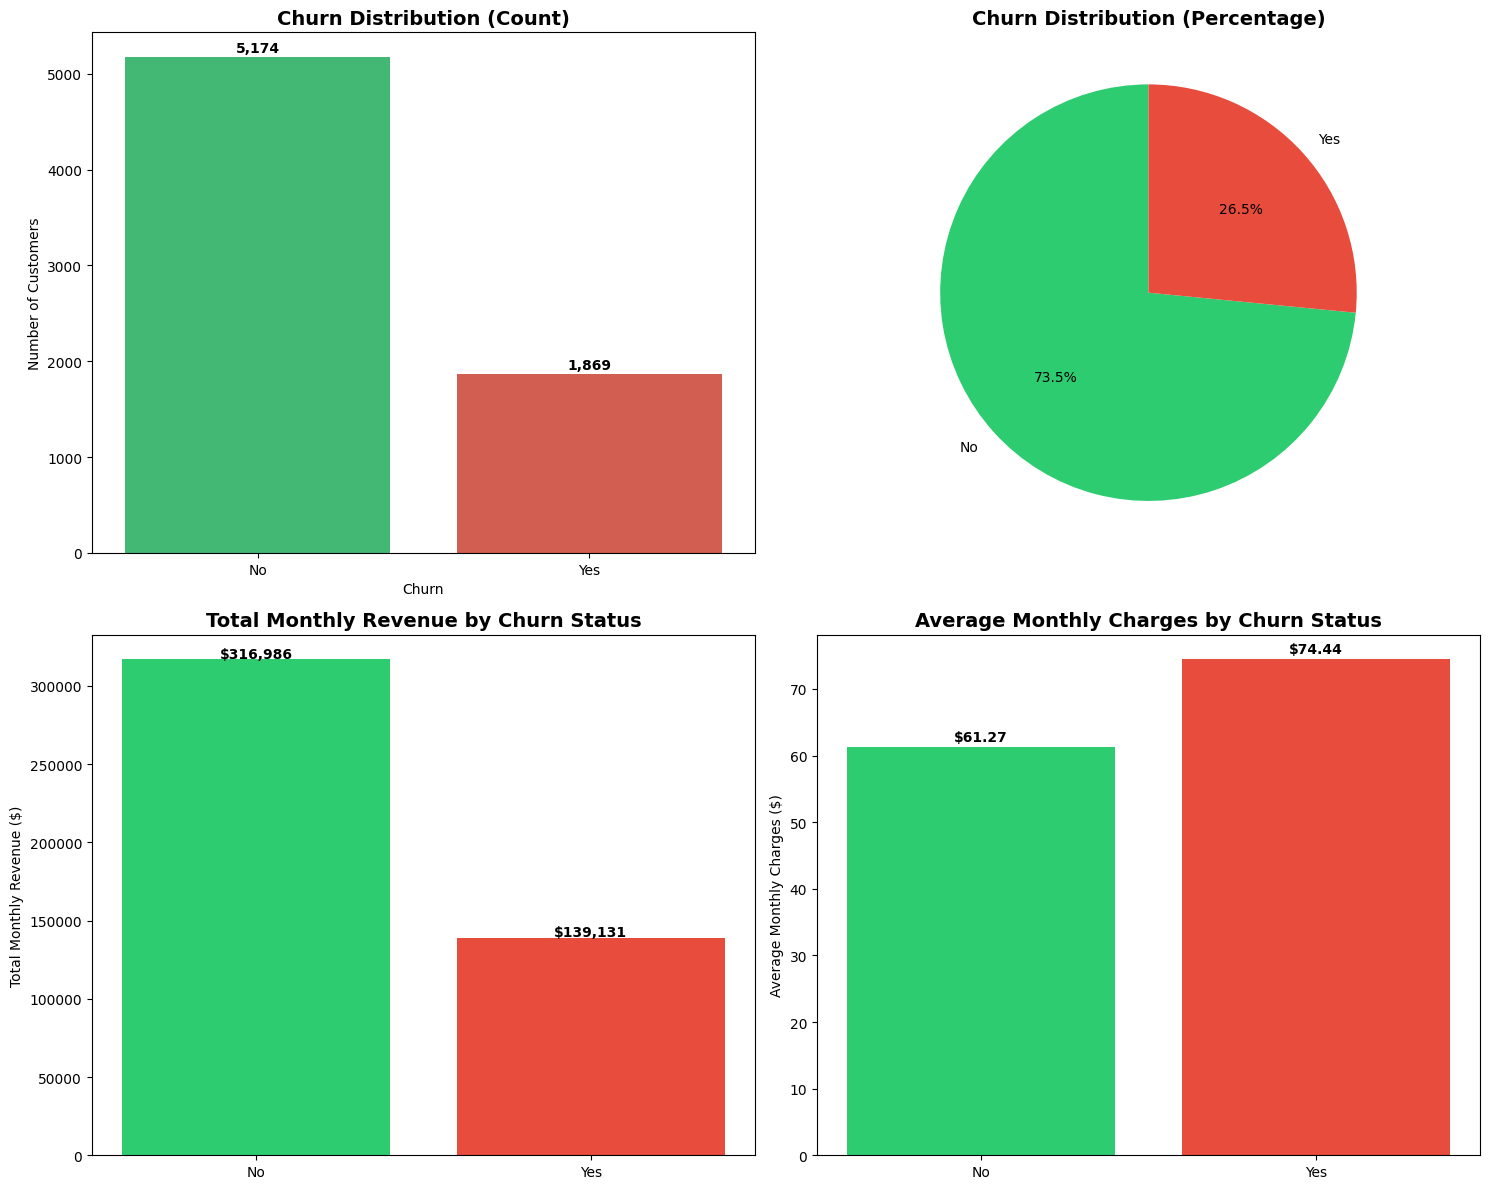


📊 KEY INSIGHTS:
   🔍 Dataset is imbalanced
   📈 Churn represents 26.5% of customers
   💰 30.5% of monthly revenue is at risk


In [27]:

# ============================================
# CELL 3: Target Variable Analysis (Churn)
# ============================================

print("🎯 CHURN TARGET VARIABLE ANALYSIS")
print("=" * 45)

# Churn distribution
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) * 100

print("📊 Churn Distribution:")
for category in churn_counts.index:
    count = churn_counts[category]
    percentage = churn_percentages[category]
    print(f"   {category}: {count:,} customers ({percentage:.1f}%)")

# Create comprehensive churn visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Count plot
sns.countplot(data=df, x='Churn', ax=axes[0,0], palette=['#2ecc71', '#e74c3c'])
axes[0,0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Number of Customers')
for i, v in enumerate(churn_counts.values):
    axes[0,0].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

# 2. Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[0,1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', 
              colors=colors, startangle=90)
axes[0,1].set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

# 3. Business impact analysis
if 'MonthlyCharges' in df.columns:
    churn_revenue = df.groupby('Churn')['MonthlyCharges'].agg(['sum', 'mean', 'count'])
    
    # Revenue by churn status
    axes[1,0].bar(churn_revenue.index, churn_revenue['sum'], color=colors)
    axes[1,0].set_title('Total Monthly Revenue by Churn Status', fontsize=14, fontweight='bold')
    axes[1,0].set_ylabel('Total Monthly Revenue ($)')
    for i, v in enumerate(churn_revenue['sum'].values):
        axes[1,0].text(i, v + 1000, f'${v:,.0f}', ha='center', fontweight='bold')
    
    # Average charges comparison
    axes[1,1].bar(churn_revenue.index, churn_revenue['mean'], color=colors)
    axes[1,1].set_title('Average Monthly Charges by Churn Status', fontsize=14, fontweight='bold')
    axes[1,1].set_ylabel('Average Monthly Charges ($)')
    for i, v in enumerate(churn_revenue['mean'].values):
        axes[1,1].text(i, v + 1, f'${v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Key insights
print(f"\n📊 KEY INSIGHTS:")
print(f"   🔍 Dataset is {'balanced' if 0.4 <= churn_rate <= 0.6 else 'imbalanced'}")
print(f"   📈 Churn represents {churn_rate:.1%} of customers")
if 'MonthlyCharges' in df.columns:
    revenue_at_risk = (df[df['Churn'] == 'Yes']['MonthlyCharges'].sum() / df['MonthlyCharges'].sum()) * 100
    print(f"   💰 {revenue_at_risk:.1f}% of monthly revenue is at risk")


📊 CATEGORICAL VARIABLES DEEP DIVE
📋 Categorical Columns (17 total):
   1. gender (2 categories)
   2. Partner (2 categories)
   3. Dependents (2 categories)
   4. PhoneService (2 categories)
   5. MultipleLines (3 categories)
   6. InternetService (3 categories)
   7. OnlineSecurity (3 categories)
   8. OnlineBackup (3 categories)
   9. DeviceProtection (3 categories)
   10. TechSupport (3 categories)
   11. StreamingTV (3 categories)
   12. StreamingMovies (3 categories)
   13. Contract (3 categories)
   14. PaperlessBilling (2 categories)
   15. PaymentMethod (4 categories)
   16. TotalCharges (6531 categories)
   17. Churn (2 categories)

🎯 CHURN RISK BY CATEGORIES:

📊 gender:
   • Female: 26.92% churn rate
   • Male: 26.16% churn rate

📊 Partner:
   • No: 32.96% churn rate
   • Yes: 19.66% churn rate

📊 Dependents:
   • No: 31.28% churn rate
   • Yes: 15.45% churn rate

📊 PhoneService:
   • Yes: 26.71% churn rate
   • No: 24.93% churn rate

📊 MultipleLines:
   • Yes: 28.61% churn r

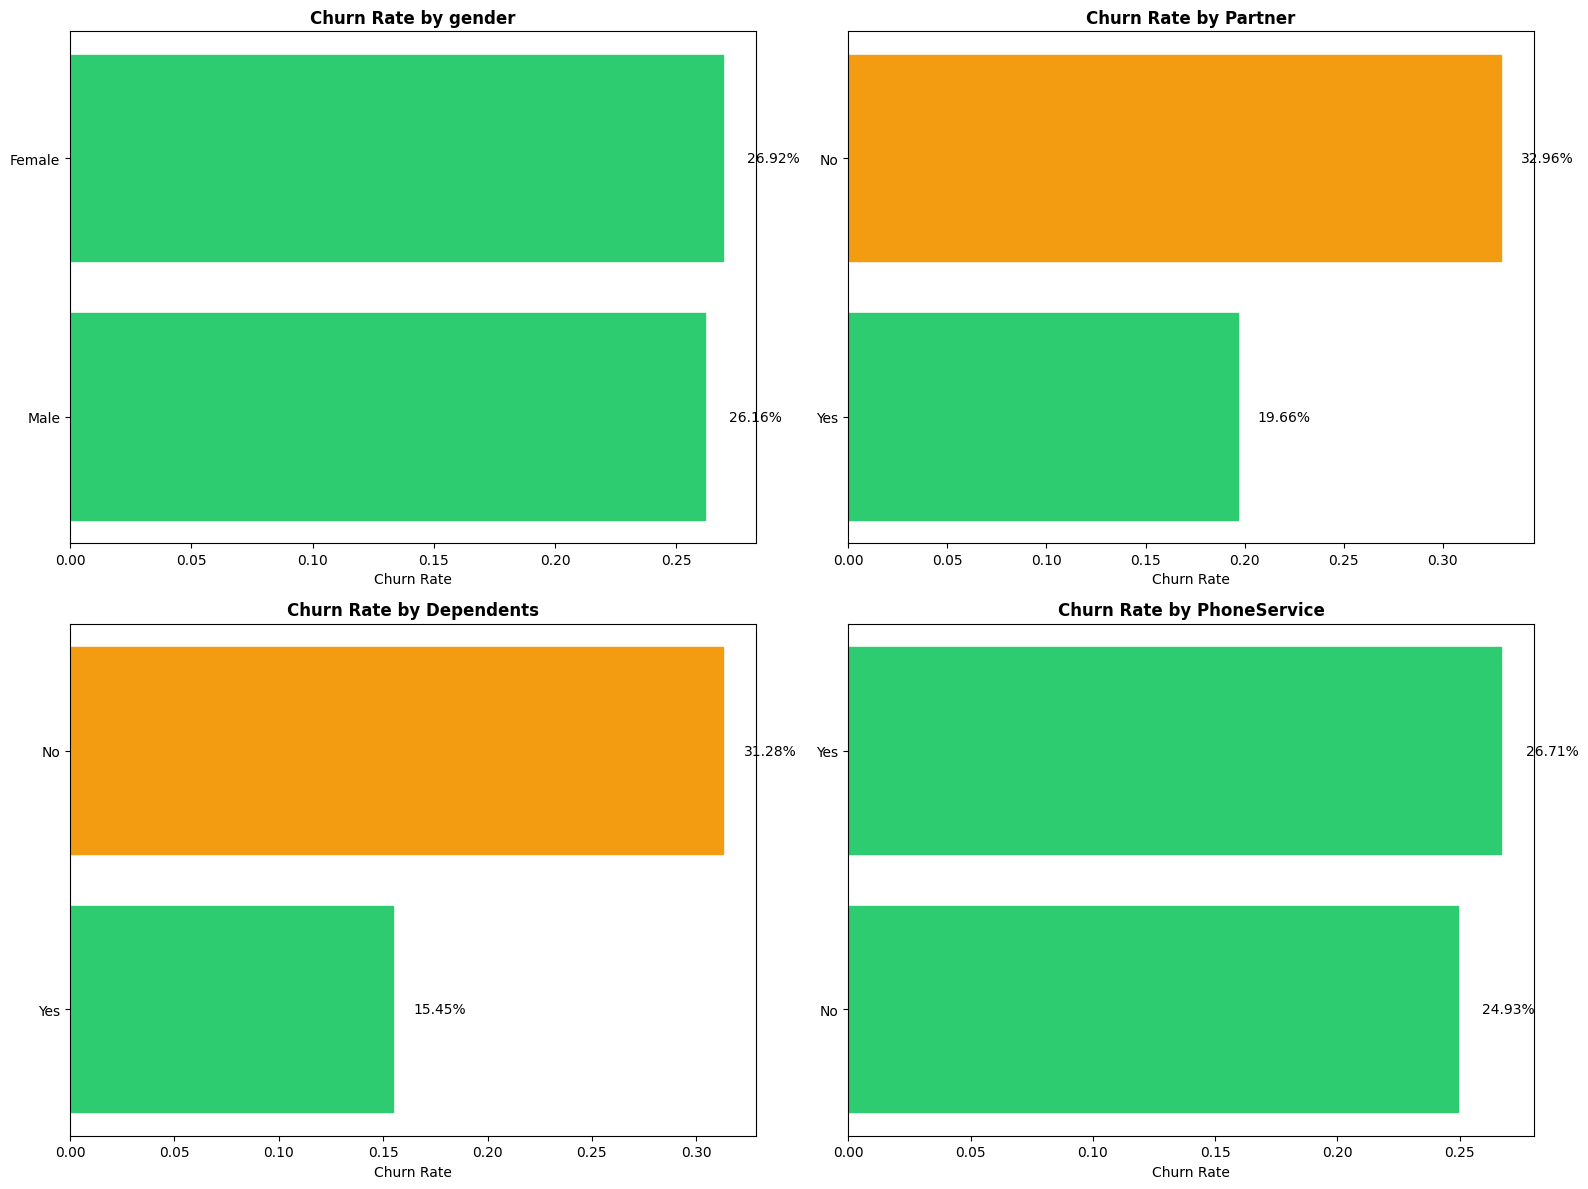

In [28]:

# ============================================
# CELL 4: Categorical Variables Analysis
# ============================================

print("📊 CATEGORICAL VARIABLES DEEP DIVE")
print("=" * 45)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')

print(f"📋 Categorical Columns ({len(categorical_cols)} total):")
for i, col in enumerate(categorical_cols, 1):
    unique_count = df[col].nunique()
    print(f"   {i}. {col} ({unique_count} categories)")

# Analyze relationship with churn for key categorical variables
key_categorical = [col for col in categorical_cols if col != 'Churn'][:8]  # Top 8

# Create churn rate analysis
churn_analysis = {}
for col in key_categorical:
    churn_by_category = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').mean())
    churn_analysis[col] = churn_by_category.sort_values(ascending=False)

# Display top churn risk factors
print(f"\n🎯 CHURN RISK BY CATEGORIES:")
for col, rates in churn_analysis.items():
    print(f"\n📊 {col}:")
    for category, rate in rates.head(3).items():
        print(f"   • {category}: {rate:.2%} churn rate")

# Visualize top categorical variables vs churn
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(key_categorical[:4]):
    if i < 4:
        # Calculate churn rates
        churn_rates = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').mean()).sort_values(ascending=True)
        
        # Create horizontal bar plot
        bars = axes[i].barh(range(len(churn_rates)), churn_rates.values)
        axes[i].set_yticks(range(len(churn_rates)))
        axes[i].set_yticklabels(churn_rates.index)
        axes[i].set_xlabel('Churn Rate')
        axes[i].set_title(f'Churn Rate by {col}', fontweight='bold')
        
        # Add value labels
        for j, v in enumerate(churn_rates.values):
            axes[i].text(v + 0.01, j, f'{v:.2%}', va='center')
        
        # Color bars by churn rate
        for j, bar in enumerate(bars):
            if churn_rates.values[j] > 0.5:
                bar.set_color('#e74c3c')  # Red for high churn
            elif churn_rates.values[j] > 0.3:
                bar.set_color('#f39c12')  # Orange for medium churn  
            else:
                bar.set_color('#2ecc71')  # Green for low churn

plt.tight_layout()
plt.show()


🔢 NUMERICAL VARIABLES ANALYSIS
📋 Numerical Columns (3 total):
   1. SeniorCitizen
   2. tenure
   3. MonthlyCharges

📊 Statistical Summary:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



🔗 Correlation Matrix:


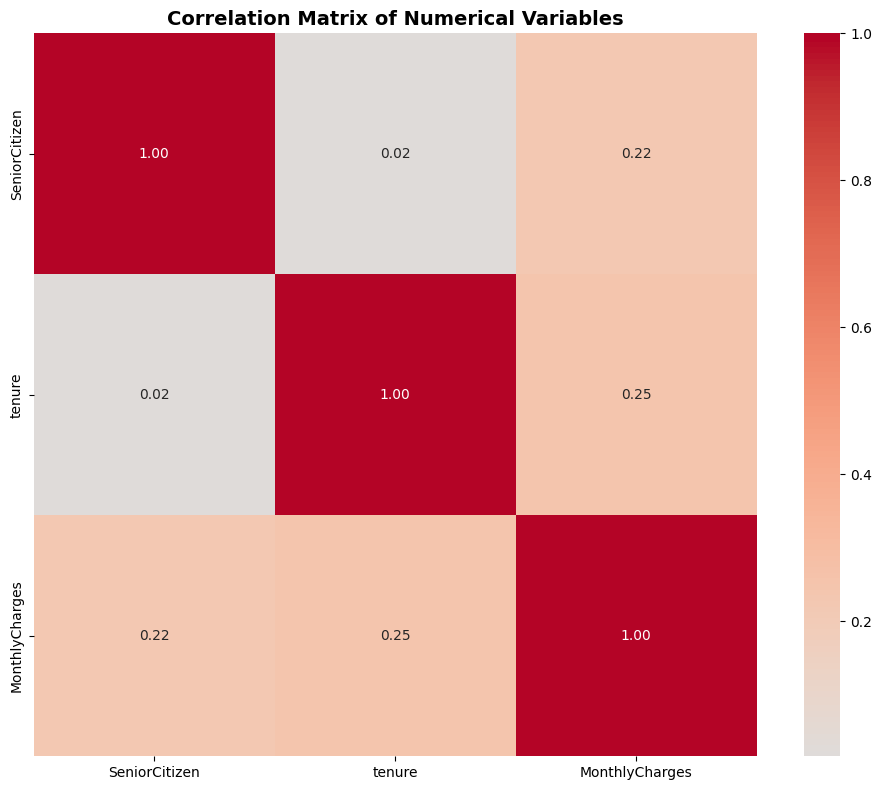

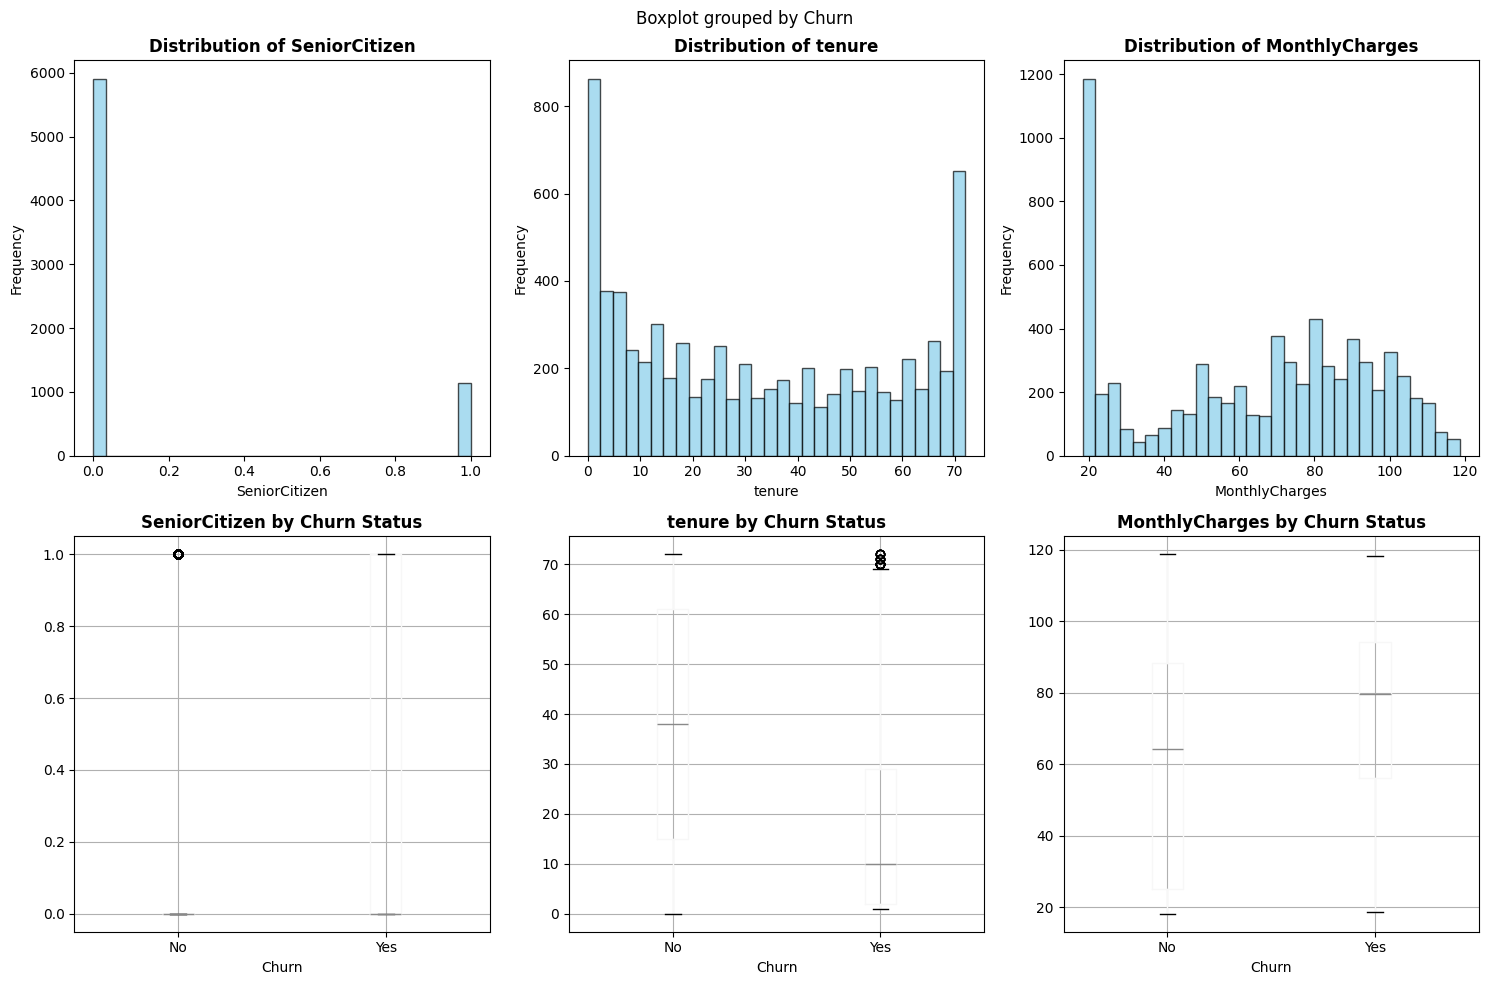


📊 NUMERICAL VARIABLES vs CHURN:

🔍 SeniorCitizen:
   Churned customers: 0.25
   Retained customers: 0.13
   Difference: +0.13 (+97.9%)

🔍 tenure:
   Churned customers: 17.98
   Retained customers: 37.57
   Difference: -19.59 (-52.1%)

🔍 MonthlyCharges:
   Churned customers: 74.44
   Retained customers: 61.27
   Difference: +13.18 (+21.5%)

🎉 Exploratory Data Analysis Complete!
📋 Key findings will guide our feature engineering and modeling!


In [29]:
# ============================================
# CELL 5: Numerical Variables Analysis
# ============================================

print("🔢 NUMERICAL VARIABLES ANALYSIS")
print("=" * 40)

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"📋 Numerical Columns ({len(numerical_cols)} total):")
for i, col in enumerate(numerical_cols, 1):
    print(f"   {i}. {col}")

# Statistical summary
print(f"\n📊 Statistical Summary:")
display(df[numerical_cols].describe())

# Correlation analysis
if len(numerical_cols) > 1:
    print(f"\n🔗 Correlation Matrix:")
    correlation_matrix = df[numerical_cols].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f')
    plt.title('Correlation Matrix of Numerical Variables', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Distribution analysis and churn relationship
fig, axes = plt.subplots(2, len(numerical_cols), figsize=(5*len(numerical_cols), 10))
if len(numerical_cols) == 1:
    axes = axes.reshape(-1, 1)

for i, col in enumerate(numerical_cols):
    # Distribution plot
    axes[0, i].hist(df[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'Distribution of {col}', fontweight='bold')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frequency')
    
    # Box plot by churn
    df.boxplot(column=col, by='Churn', ax=axes[1, i])
    axes[1, i].set_title(f'{col} by Churn Status', fontweight='bold')
    axes[1, i].set_xlabel('Churn')

plt.tight_layout()
plt.show()

# Numerical variables vs churn analysis
print(f"\n📊 NUMERICAL VARIABLES vs CHURN:")
for col in numerical_cols:
    churned_mean = df[df['Churn'] == 'Yes'][col].mean()
    retained_mean = df[df['Churn'] == 'No'][col].mean()
    difference = churned_mean - retained_mean
    percent_diff = (difference / retained_mean) * 100 if retained_mean != 0 else 0
    
    print(f"\n🔍 {col}:")
    print(f"   Churned customers: {churned_mean:.2f}")
    print(f"   Retained customers: {retained_mean:.2f}")
    print(f"   Difference: {difference:+.2f} ({percent_diff:+.1f}%)")

print(f"\n🎉 Exploratory Data Analysis Complete!")
print(f"📋 Key findings will guide our feature engineering and modeling!")